# VAE visualization for all datasets

In [1]:
!source ../CFE/bin/activate

In [2]:
import torch
import torchvision.transforms as T

from utils.Models import VAE
from utils.datasets import BinaryDataset
from utils.utils import plot_generated_images
from utils.utils import seed_everything

In [3]:
data_dir = '../SCRATCH'
model_save_dir = '../SCRATCH/CFE_models'
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [4]:
seed = 10
seed_everything(seed)

Global seed set to 10


10

### WaterBirds Dataset

In [5]:
waterbirds_transform = T.Compose([
            T.Resize((int(224 * (256 / 224)), int(224 * (256 / 224)),)),
            T.CenterCrop(224),
            T.ToTensor(),
        ])

waterbirds_reverse_transform = T.Compose([
    T.ToPILImage(),
])

In [6]:
from wilds import get_dataset

In [7]:
main_data = get_dataset(dataset="waterbirds", download=False,root_dir=data_dir)
train_data = main_data.get_subset("train", transform=waterbirds_transform)
train_data = BinaryDataset(train_data, which_dataset='waterbirds')

In [8]:
class_0_indices = [i for i in range(len(train_data)) 
                   if train_data[i][1] == 0]
class_1_indices = [i for i in range(len(train_data)) 
                   if train_data[i][1] == 1]

train_data_class_0 = torch.utils.data.Subset(train_data, class_0_indices)
train_data_class_1 = torch.utils.data.Subset(train_data, class_1_indices)

In [ ]:
train_data_class_0_dataloader = torch.utils.data.DataLoader(train_data_class_0, 
                                                batch_size=20, 
                                                shuffle=False,
                                                num_workers=3,
                                                pin_memory=True
)
train_data_class_1_dataloader = torch.utils.data.DataLoader(train_data_class_1, 
                                                batch_size=10, 
                                                shuffle=False,
                                                num_workers=3,
                                                pin_memory=True
)

In [ ]:
waterbirds_vae_0 = VAE()
waterbirds_vae_1 = VAE()

waterbirds_vae_0 = waterbirds_vae_0.to(device)
waterbirds_vae_1 = waterbirds_vae_1.to(device)

waterbirds_vae_0_state_dict = torch.load(f'{model_save_dir}/WaterBirds_class_0_seed_{seed}.pt')
waterbirds_vae_1_state_dict = torch.load(f'{model_save_dir}/WaterBirds_class_1_seed_{seed}.pt')

waterbirds_vae_0.load_state_dict(waterbirds_vae_0_state_dict)
waterbirds_vae_1.load_state_dict(waterbirds_vae_1_state_dict)

waterbirds_vae_0.eval()
waterbirds_vae_1.eval()

In [ ]:
plot_generated_images(data_loader=train_data_class_0_dataloader,
                      model=waterbirds_vae_0,
                      device=device,
                      unnormalizer=None,
                      modeltype='VAE',
                      n_images=5
)

### Spuco Dogs Dataset

In [5]:
SpucoDogs_transform = T.Compose([
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor()
])

In [6]:
from utils.datasets import SpuCoDogsDataset

In [7]:
train_data = SpuCoDogsDataset(f'{data_dir}/spuco_dogs/val', transform=SpucoDogs_transform)
train_data = BinaryDataset(train_data, 'spuco_dogs')

In [8]:
class_0_indices = [i for i in range(len(train_data)) 
                   if train_data[i][1] == 0]
class_1_indices = [i for i in range(len(train_data)) 
                   if train_data[i][1] == 1]

train_data_class_0 = torch.utils.data.Subset(train_data, class_0_indices)
train_data_class_1 = torch.utils.data.Subset(train_data, class_1_indices)

In [13]:
train_data_class_0_dataloader = torch.utils.data.DataLoader(train_data_class_0, 
                                                batch_size=20, 
                                                shuffle=True,
                                                num_workers=3,
                                                pin_memory=True
)
train_data_class_1_dataloader = torch.utils.data.DataLoader(train_data_class_1, 
                                                batch_size=20, 
                                                shuffle=True,
                                                num_workers=3,
                                                pin_memory=True
)

In [10]:
spuco_dogs_vae_0 = VAE()
spuco_dogs_vae_1 = VAE()

spuco_dogs_vae_0 = spuco_dogs_vae_0.to(device)
spuco_dogs_vae_1 = spuco_dogs_vae_1.to(device)

vae_0_state_dict = torch.load(f'{model_save_dir}/SpuCO_dogs_class_0_seed_{seed}.pt')
vae_1_state_dict = torch.load(f'{model_save_dir}/SpuCO_dogs_class_1_seed_{seed}.pt')

spuco_dogs_vae_0.load_state_dict(vae_0_state_dict)
spuco_dogs_vae_1.load_state_dict(vae_1_state_dict)

spuco_dogs_vae_0.eval()
spuco_dogs_vae_1.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1, inplace=True)
    (3): Dropout2d(p=0.1, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1, inplace=True)
    (7): Dropout2d(p=0.1, inplace=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.1, inplace=True)
    (11): Dropout2d(p=0.1, inplace=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, tr

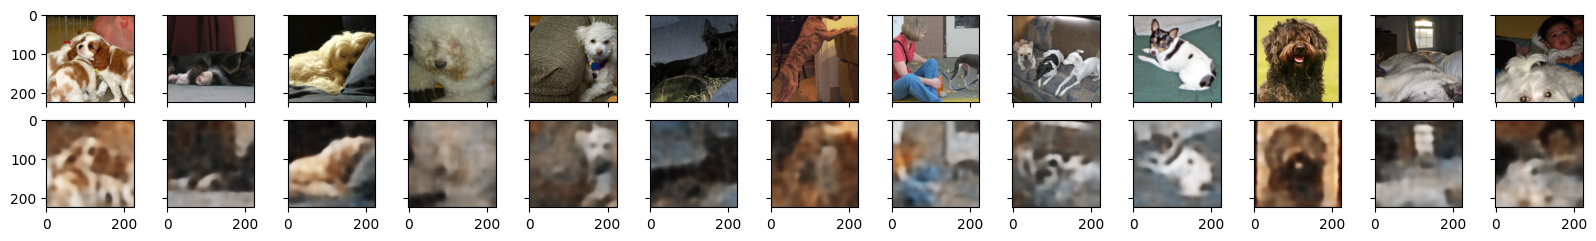

In [23]:
plot_generated_images(data_loader=train_data_class_1_dataloader,
                      model=spuco_dogs_vae_1,
                      device=device,
                      unnormalizer=None,
                      modeltype='VAE',
                      n_images=13
)